In [1]:
#Importing the libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')
import yfinance as yf




In [2]:
assets = ['HDFCBANK.NS', 'RELIANCE.NS', 'TCS.NS', 'HINDUNILVR.NS', 'INFY.NS']


In [3]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [4]:
stockStartDate = '2015-01-01'

In [5]:
today = datetime.today().strftime('%Y-%m-%d')
today


'2022-12-29'

In [6]:
#Importing the data
df = pd.DataFrame()

for stock in assets:
    df[stock] = yf.download(stock, data_source=' yahoo', start= stockStartDate, end= today)['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
df 

,HDFCBANK.NS,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,INFY.NS
Date,,,,,
2015-01-01,451.475220,417.988922,1097.644043,663.048584,403.362732
2015-01-02,457.758606,416.882568,1112.261475,660.863159,411.289490
2015-01-05,453.893768,412.316254,1095.358154,664.665955,407.755066
2015-01-06,446.827942,393.603485,1054.976562,677.254639,399.235931
2015-01-07,448.132080,402.171326,1042.514771,701.033325,401.146149
...,...,...,...,...,...
2022-12-22,1612.050049,2577.800049,3259.699951,2645.350098,1522.050049
2022-12-23,1597.650024,2502.199951,3228.350098,2621.100098,1497.099976
2022-12-26,1629.449951,2524.050049,3252.899902,2617.449951,1502.400024


In [8]:
df.shape

(1974, 5)

<function matplotlib.pyplot.show(close=None, block=None)>

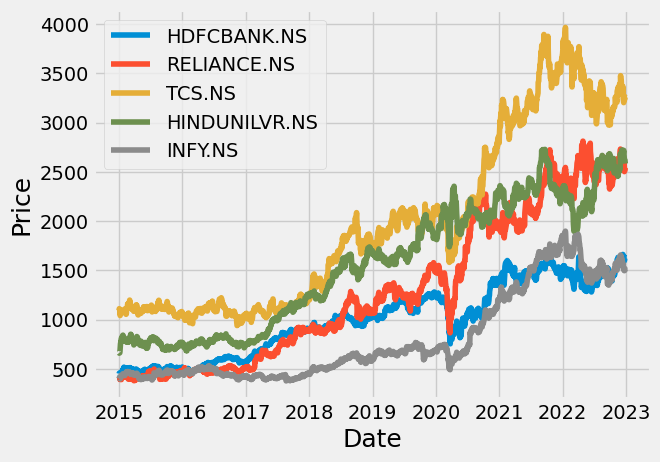

In [9]:
#Visualize

title = 'Portfolio History'

my_stocks = df

for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c)

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show

In [10]:
#show daily returns
returns = df.pct_change()
returns


,HDFCBANK.NS,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,INFY.NS
Date,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.013917,-0.002647,0.013317,-0.003296,0.019652
2015-01-05,-0.008443,-0.010953,-0.015197,0.005754,-0.008594
2015-01-06,-0.015567,-0.045385,-0.036866,0.018940,-0.020893
2015-01-07,0.002919,0.021768,-0.011812,0.035110,0.004785
...,...,...,...,...,...
2022-12-22,-0.003431,-0.002592,-0.002708,-0.007820,0.008281
2022-12-23,-0.008933,-0.029327,-0.009617,-0.009167,-0.016392
2022-12-26,0.019904,0.008732,0.007604,-0.001393,0.003540


In [11]:
#Create and show annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual


,HDFCBANK.NS,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,INFY.NS
HDFCBANK.NS,0.054690,0.027514,0.015031,0.015887,0.018178
RELIANCE.NS,0.027514,0.086228,0.019473,0.019159,0.020645
TCS.NS,0.015031,0.019473,0.059544,0.014110,0.036936
HINDUNILVR.NS,0.015887,0.019159,0.014110,0.055532,0.015022
INFY.NS,0.018178,0.020645,0.036936,0.015022,0.074306


In [12]:
#Calculate portfolio variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
print('Portfolio Variance: ', port_variance)

Portfolio Variance:  0.029368317257330308


In [13]:
#Calculate portfolio volatility
port_volatility = np.sqrt(port_variance)

print('Portfolio volatility: ', port_volatility)

Portfolio volatility:  0.1713718683370474


In [14]:
#Annual Portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) *252

print('Annual Portfolio return: ', portfolioSimpleAnnualReturn)

Annual Portfolio return:  0.20820776515824413


In [15]:
#Show expected annual return, volatility, variance

percent_var = str( round(port_variance, 2) * 100) + '%'
percent_vols = str( round(port_volatility, 2) * 100) + '%'
percent_ret = str( round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility/risk: '+ percent_vols)
print('Annual variance: '+ percent_var)

Expected annual return: 21.0%
Annual volatility/risk: 17.0%
Annual variance: 3.0%


In [16]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [17]:
#Calculate expected returns and annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for max sharp ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('HDFCBANK.NS', 0.18667), ('RELIANCE.NS', 0.29371), ('TCS.NS', 0.05409), ('HINDUNILVR.NS', 0.30789), ('INFY.NS', 0.15764)])
Expected annual return: 20.5%
Annual volatility: 17.7%
Sharpe Ratio: 1.04


(0.20489550542866128, 0.17719831539563874, 1.0434382799624065)

In [18]:
#Get discreet allocation for each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value= 150000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ₹{:.2f}'.format(leftover))

Discrete allocation:  {'HDFCBANK.NS': 17, 'RELIANCE.NS': 17, 'TCS.NS': 3, 'HINDUNILVR.NS': 18, 'INFY.NS': 15}
Funds remaining: ₹109.40
